<a href="https://colab.research.google.com/github/ekral3/Earthquakes-in-Northeastern-Arkansas/blob/main/Exercise_1_GEOL_580_Mapping_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.cbook import get_sample_data
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
import cartopy.io.img_tiles as cimgt
from matplotlib.offsetbox import AnchoredText
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Mbox_lon=np.array([-95,-95,-87,-87,-95])
Mbox_lat=np.array([35,40,40,35,35])

plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.Robinson(central_longitude=-90))
ax.stock_img()
ax.gridlines(draw_lables=True, dms=True, x_inline=False, y_inline=False)
ax.coastlines(resolution='110m')


Text(-98, 32, 'Midwest USA')

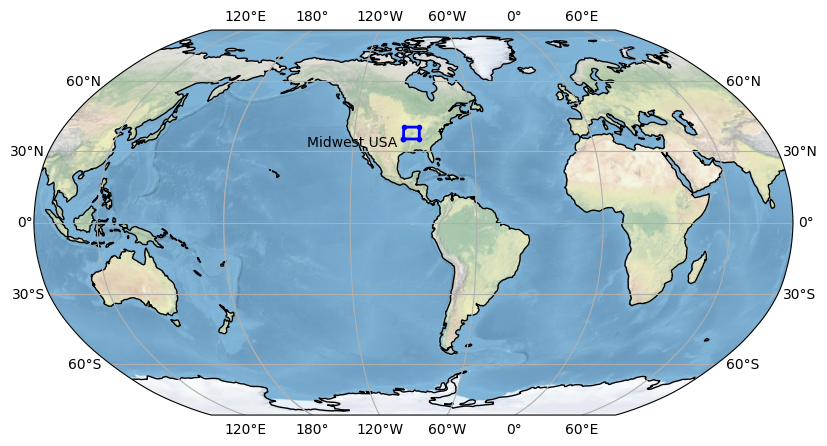

In [ ]:
Mbox_lon=np.array([-95,-95,-87,-87,-95])
Mbox_lat=np.array([35,40,40,35,35])

plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.Robinson(central_longitude=-90))
ax.stock_img()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.coastlines(resolution='110m')

plt.plot(Mbox_lon, Mbox_lat, color='blue', linewidth=2, marker=".",
         transform=ccrs.Geodetic(),
)

plt.text(Mbox_lon[0]-3, Mbox_lat[0]-3, 'Midwest USA',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

In [ ]:
from google.colab import files
import pandas as pd

# Upload your file (a “Choose file” button will appear)
uploaded = files.upload()

# Replace 'yourfile.csv' with your actual filename
df = pd.read_excel('Draft CSV.xlsx')

# Show first few rows
df.head()

Saving Draft CSV.xlsx to Draft CSV (1).xlsx


,EVENTID,TYPE,AUTHOR,DATE,TIME,LAT,LON,DEPTH,DEPFIX,AUTHOR .1,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,719175,ke,NEIS,27775,0.821493,35.9230,-92.1230,14.0,,SLM;NEIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,717057,ke,ISC,27844,0.028708,35.6778,-90.3188,11.0,TRUE,ISC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,717058,ke,ISC,27844,0.041793,35.6575,-90.3830,11.0,TRUE,NEIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,714431,ke,NEIS,27902,0.319977,36.0400,-89.8400,10.0,,SLM;NEIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,709085,ke,NEIS,28028,0.588148,35.6100,-90.4500,5.0,,SLM;NEIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

df = pd.read_excel('Draft CSV (1).xlsx')

# Display the first few rows to confirm it's loaded
display(df.head())

# Display the total number of rows and columns
display(df.shape)

,EVENTID,TYPE,AUTHOR,DATE,TIME,LAT,LON,DEPTH,DEPFIX,AUTHOR .1,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,719175,ke,NEIS,27775,0.821493,35.9230,-92.1230,14.0,,SLM;NEIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,717057,ke,ISC,27844,0.028708,35.6778,-90.3188,11.0,TRUE,ISC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,717058,ke,ISC,27844,0.041793,35.6575,-90.3830,11.0,TRUE,NEIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,714431,ke,NEIS,27902,0.319977,36.0400,-89.8400,10.0,,SLM;NEIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,709085,ke,NEIS,28028,0.588148,35.6100,-90.4500,5.0,,SLM;NEIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(1547, 39)

In [ ]:
# Clean up column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Use the existing df DataFrame
eqlon = df.LON
eqlat = df.LAT
eqz = df.DEPTH
eqM = df.MAG
eqD = df.DATE

# Display the tail of the DataFrame to confirm the data is available
display(df.tail())

,EVENTID,TYPE,AUTHOR,DATE,TIME,LAT,LON,DEPTH,DEPFIX,AUTHOR .1,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
1542,622450688,se,NEIC,44394,0.122496,36.1488,-91.1095,10.0,TRUE,NEIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,622450766,se,NEIC,44402,0.016235,36.4493,-92.8653,5.0,TRUE,NEIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544,622451513,se,NEIC,44423,0.227217,36.0994,-89.4026,8.7,,NEIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1545,621070940,se,NEIC,44452,0.170128,36.2426,-89.4035,9.8,,NEIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1546,622499465,se,NEIC,44468,0.730838,36.1875,-92.6765,4.9,,NEIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display all column names in the DataFrame
print(df.columns)

Index(['  EVENTID', 'TYPE', 'AUTHOR   ', 'DATE      ', 'TIME       ',
       'LAT     ', 'LON      ', 'DEPTH', 'DEPFIX', 'AUTHOR   .1', 'TYPE  ',
       'MAG ', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38'],
      dtype='object')


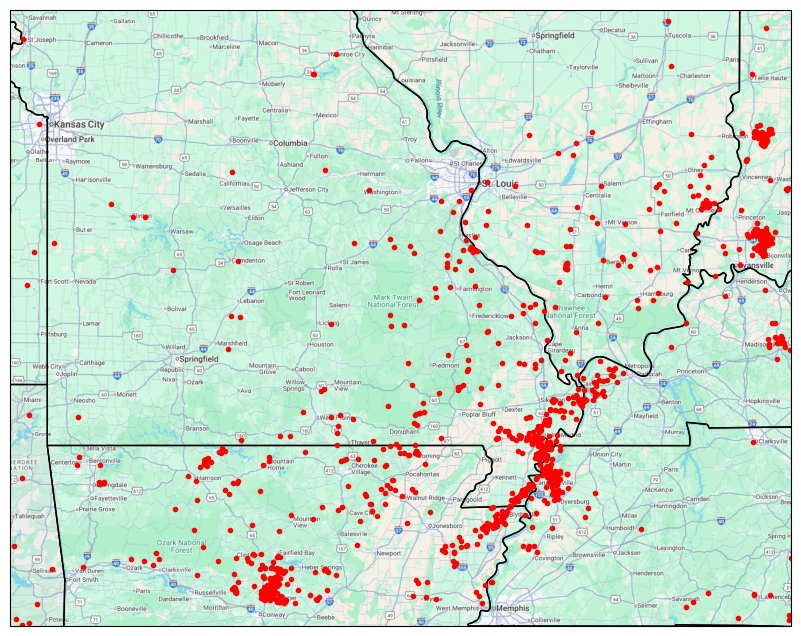

In [ ]:
# Change the image tile source to Google Tiles for aerial imagery
stamen_terrain=cimgt.GoogleTiles()
fig=plt.figure(figsize=(12, 8))

# Create a GeoAxes in the title's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map
ax.set_extent([-95, -87, 35, 40], crs=ccrs.Geodetic())

# Add the Google Aerial data at zoom level 8.
ax.add_image(stamen_terrain, 8)

# Add the state outlines using cfeature.STATES
ax.add_feature(cfeature.STATES, edgecolor='black')

# Add the earthquakes
ax.plot(eqlon, eqlat, marker='.', color='red', linewidth=0, transform=ccrs.Geodetic())

plt.show()

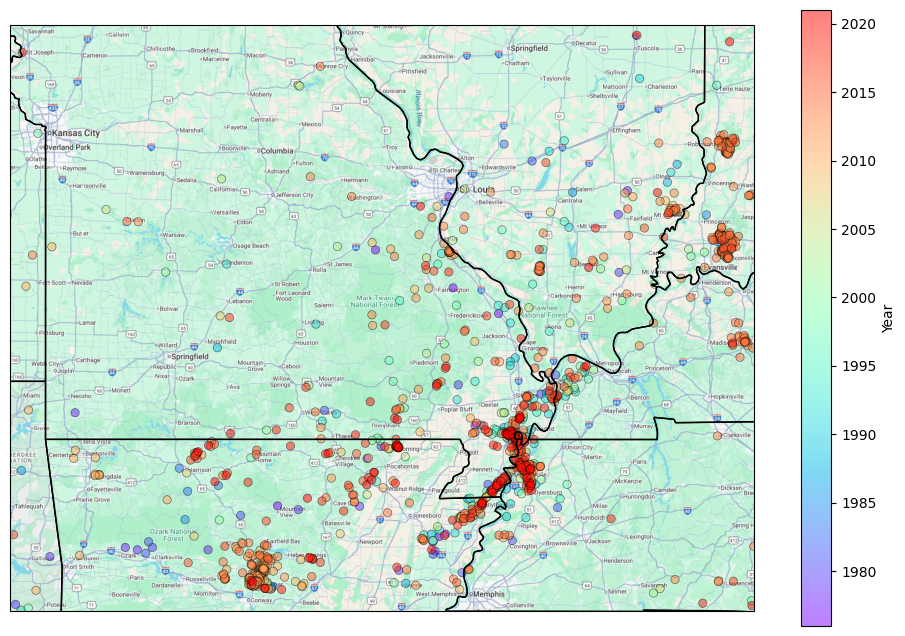

In [ ]:
# Lets make a map where the earthquakes are color coded by year

fig=plt.figure(figsize=(12, 8))

# Change the image tile source to Google Tiles for aerial imagery
stamen_terrain=cimgt.GoogleTiles()

# Create a GeoAxes in the title's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map
ax.set_extent([-95, -87, 35, 40], crs=ccrs.Geodetic())

# Add the Google Aerial data at zoom level 8.
ax.add_image(stamen_terrain, 8)

# Add the state outlines using cfeature.STATES
ax.add_feature(cfeature.STATES, edgecolor='black')

# Convert Excel date format manually to datetime objects and extract the year
# Ensure eqD is numeric
eqD_numeric = pd.to_numeric(eqD)
excel_epoch = pd.Timestamp('1899-12-30')
eq_datetimes = pd.to_timedelta(eqD_numeric, unit='d') + excel_epoch
eq_years = eq_datetimes.dt.year

# Add the earthquakes, colored by year
ec = ax.scatter(eqlon, eqlat, c=eq_years, edgecolor='black', linewidth=0.5, transform=ccrs.Geodetic(), alpha=0.5, cmap='rainbow')

# Add the colorbar and label it by year
cbar=plt.colorbar(ec)
cbar.set_label('Year')

plt.show()

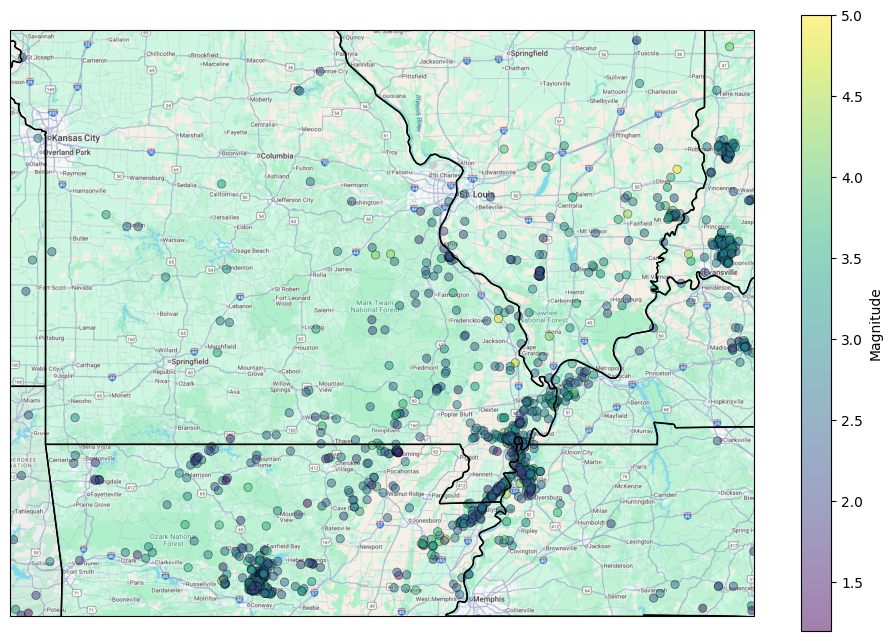

In [ ]:
# Create a map where the earthquakes are color coded by magnitude

fig=plt.figure(figsize=(12, 8))

# Change the image tile source to Google Tiles for aerial imagery
stamen_terrain=cimgt.GoogleTiles()

# Create a GeoAxes in the title's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map
ax.set_extent([-95, -87, 35, 40], crs=ccrs.Geodetic())

# Add the Google Aerial data at zoom level 8.
ax.add_image(stamen_terrain, 8)

# Add the state outlines using cfeature.STATES
ax.add_feature(cfeature.STATES, edgecolor='black')

# Add the earthquakes, colored by magnitude
# Use eqM for the color argument
ec = ax.scatter(eqlon, eqlat, c=eqM, edgecolor='black', linewidth=0.5, transform=ccrs.Geodetic(), alpha=0.5, cmap='viridis')

# Add the colorbar and label it by magnitude
cbar=plt.colorbar(ec)
cbar.set_label('Magnitude')

plt.show()